<a href="https://colab.research.google.com/github/gaoqisheng123-bot/machine-learning-zoomcamp-homework/blob/main/machine_learning_zoomcamp_homework_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-05 11:38:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.05s   

2025-10-05 11:38:44 (17.9 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [4]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [5]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [6]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [9]:
print(df['fuel_efficiency_mpg'].describe())

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64


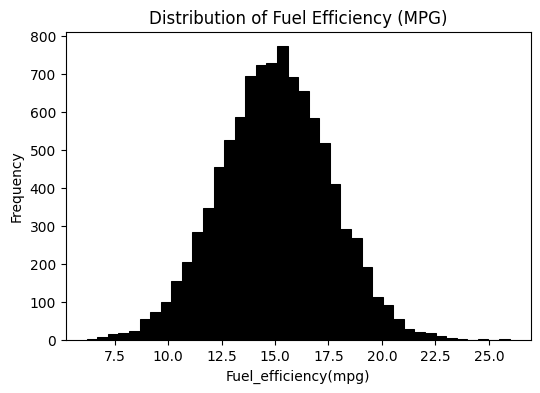

In [15]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Fuel_efficiency(mpg)')
plt.title('Distribution of Fuel Efficiency (MPG)')

plt.show()

In [12]:
#n1
df.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [13]:
#n2
df['horsepower'].median()

149.0

In [16]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [17]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [21]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [24]:
#na to 0
def prepare_X_fill0(df):
    df_num_1 = df[base].copy()
    df_num_1 = df_num_1.fillna(0)
    return df_num_1.values


X_train = prepare_X_fill0(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse(y_train, y_pred)

np.float64(0.5202614265099076)

In [29]:
#na to mean

train_mean = df_train[base].mean()
print(train_mean)

def prepare_X_fillmean(df, mean_values):
    df_num_2 = df[base].copy()
    df_num_2 = df_num_2.fillna(mean_values)
    return df_num_2.values


X_train = prepare_X_fillmean(df_train, train_mean)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse(y_train, y_pred)


engine_displacement     199.429945
horsepower              149.544764
vehicle_weight         3006.672919
model_year             2011.444712
dtype: float64


np.float64(0.4624412137959964)

In [31]:
#n4

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


X_train = prepare_X_fill0(df_train)
X_val = prepare_X_fill0(df_val)


for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),2)
    print('%6s' %r, score)



     0 0.52
  0.01 0.52
   0.1 0.52
     1 0.52
     5 0.52
    10 0.52
   100 0.52


In [36]:
#n5
rmse_scores = []

for seed in range(10):
  np.random.seed(seed = seed)
  n = len(df)
  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)
  idx = np.arange(n)
  np.random.shuffle(idx)
  df_shuffled = df.iloc[idx]
  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()


  y_train = df_train.fuel_efficiency_mpg.values
  y_val = df_val.fuel_efficiency_mpg.values
  y_test = df_test.fuel_efficiency_mpg.values

  w0, w = train_linear_regression(X_train, y_train)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)
  rmse_scores.append(score)
  print(f"Seed {seed}: RMSE = {round(score, 3)}")


std = np.std(rmse_scores)
print("\nRMSE scores:", np.round(rmse_scores, 3))
print("Standard deviation of RMSE:", round(std, 3))

Seed 0: RMSE = 2.504
Seed 1: RMSE = 2.539
Seed 2: RMSE = 2.526
Seed 3: RMSE = 2.599
Seed 4: RMSE = 2.505
Seed 5: RMSE = 2.482
Seed 6: RMSE = 2.549
Seed 7: RMSE = 2.493
Seed 8: RMSE = 2.56
Seed 9: RMSE = 2.499

RMSE scores: [2.504 2.539 2.526 2.599 2.505 2.482 2.549 2.493 2.56  2.499]
Standard deviation of RMSE: 0.034


In [38]:
#n6

np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

df_full_train = pd.concat([df_train, df_val])
X_full_train = prepare_X_fill0(df_full_train)
X_test = prepare_X_fill0(df_test)
y_full_train = df_full_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

y_pred = w0 + X_test.dot(w)
test_rmse = rmse(y_test, y_pred)

print("Test RMSE:", round(test_rmse, 3))


Test RMSE: 0.516
